<a href="https://colab.research.google.com/github/amilsiddik/Deep-Learning/blob/main/Max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 14.7 MB/s 


In [4]:
import os

In [7]:
import pathlib
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import tensorflow as tf
import keras
import tensorflow_addons as tfa
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import interp
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

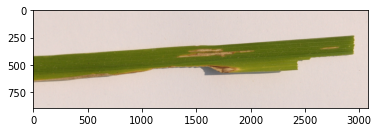

In [8]:
directory = "/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG"
img = mpimg.imread(directory)
imgplot = plt.imshow(img)
plt.show()

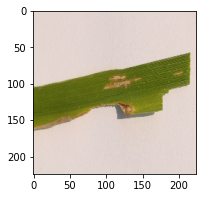

In [9]:
#Visualisasi citra yang diresize
img_resize = load_img(directory, grayscale=False, color_mode='rgb',
target_size=(224,224))
plt.figure(figsize=(3,3))
imgplot = plt.imshow(img_resize)

In [11]:
# Mengubah gambar menjadi array
img_arr = img_to_array(img_resize)
img_arr

array([[[230., 215., 210.],
        [227., 214., 208.],
        [226., 211., 208.],
        ...,
        [231., 216., 211.],
        [231., 216., 211.],
        [230., 217., 211.]],

       [[227., 214., 208.],
        [227., 214., 208.],
        [229., 214., 211.],
        ...,
        [230., 215., 210.],
        [228., 215., 209.],
        [231., 216., 211.]],

       [[228., 215., 209.],
        [228., 215., 209.],
        [230., 212., 208.],
        ...,
        [228., 215., 209.],
        [229., 216., 210.],
        [232., 214., 210.]],

       ...,

       [[229., 216., 210.],
        [228., 215., 207.],
        [228., 215., 209.],
        ...,
        [225., 214., 210.],
        [229., 216., 210.],
        [228., 215., 209.]],

       [[228., 215., 209.],
        [228., 213., 208.],
        [229., 216., 210.],
        ...,
        [225., 214., 210.],
        [229., 216., 210.],
        [228., 215., 209.]],

       [[227., 214., 208.],
        [229., 214., 211.],
        [229., 2

In [12]:
# Melakukan normalisasi
img_norm = img_arr/255.0
img_norm

array([[[0.9019608 , 0.84313726, 0.8235294 ],
        [0.8901961 , 0.8392157 , 0.8156863 ],
        [0.8862745 , 0.827451  , 0.8156863 ],
        ...,
        [0.90588236, 0.84705883, 0.827451  ],
        [0.90588236, 0.84705883, 0.827451  ],
        [0.9019608 , 0.8509804 , 0.827451  ]],

       [[0.8901961 , 0.8392157 , 0.8156863 ],
        [0.8901961 , 0.8392157 , 0.8156863 ],
        [0.8980392 , 0.8392157 , 0.827451  ],
        ...,
        [0.9019608 , 0.84313726, 0.8235294 ],
        [0.89411765, 0.84313726, 0.81960785],
        [0.90588236, 0.84705883, 0.827451  ]],

       [[0.89411765, 0.84313726, 0.81960785],
        [0.89411765, 0.84313726, 0.81960785],
        [0.9019608 , 0.83137256, 0.8156863 ],
        ...,
        [0.89411765, 0.84313726, 0.81960785],
        [0.8980392 , 0.84705883, 0.8235294 ],
        [0.9098039 , 0.8392157 , 0.8235294 ]],

       ...,

       [[0.8980392 , 0.84705883, 0.8235294 ],
        [0.89411765, 0.84313726, 0.8117647 ],
        [0.89411765, 0

In [15]:
# Direktori dataset
dir = '/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases'

In [16]:
# Nama-nama kelas pada dataset
File=[]
for file in os.listdir(dir):
 File+=[file]
print(File)

['Brown spot', 'Leaf smut', 'Bacterial leaf blight']


In [17]:
# Direktori masing-masing kelas
# Directory with our Bacterial Leaf Blight pictures
train_bacterial_dir = os.path.join('/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Bacterial leaf blight')

In [19]:
# Directory with our Brown Spot pictures
train_brown_dir = os.path.join('/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Brown spot')

In [20]:
# Directory with our Leaf Smut pictures
train_leaf_dir = os.path.join('/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Leaf smut')

In [21]:
# Mengambil nama file masing-masing kelas
train_bacterial_names = os.listdir(train_bacterial_dir)
print("File names in Bacterial Leaf Blight directory:")
print(train_bacterial_names[:10])

File names in Bacterial Leaf Blight directory:
['DSC_0377.JPG', 'DSC_0378.JPG', 'DSC_0379.JPG', 'DSC_0365.JPG', 'DSC_0373.JPG', 'DSC_0374.JPG', 'DSC_0375.JPG', 'DSC_0376.JPG', 'DSC_0380.JPG', 'DSC_0382.JPG']


In [22]:
train_brown_names = os.listdir(train_brown_dir)
print("\nFile names in Brown Spot directory:")
print(train_brown_names[:10])


File names in Brown Spot directory:
['DSC_0300.JPG', 'DSC_0301.JPG', 'DSC_0299.JPG', 'DSC_0302.JPG', 'DSC_0332.JPG', 'DSC_0292.JPG', 'DSC_0295.JPG', 'DSC_0303.JPG', 'DSC_0304.JPG', 'DSC_0305.JPG']


In [23]:
train_leaf_names = os.listdir(train_leaf_dir)
print("\nFile names in Leaf Smut directory:")
print(train_leaf_names[:10])


File names in Leaf Smut directory:
['DSC_0508.jpg', 'DSC_0308.JPG', 'DSC_0309.JPG', 'DSC_0316.JPG', 'DSC_0327.JPG', 'DSC_0338.JPG', 'DSC_0331.JPG', 'DSC_0293.JPG', 'DSC_0310.JPG', 'DSC_0317.JPG']


In [24]:
# Menampilkan jumlah citra pada masing-masing kelas
print('total Bacterial Leaf Blight images:',
len(os.listdir(train_bacterial_dir)))
print('total Brown Spot images:', len(os.listdir(train_brown_dir)))
print('total Leaf Smut images:', len(os.listdir(train_leaf_dir)))

total Bacterial Leaf Blight images: 40
total Brown Spot images: 40
total Leaf Smut images: 40


In [25]:
%matplotlib inline
# Parameters for our graph; we'll output images in a 3x3 configuration
nrows = 3
ncols = 3

In [26]:
# Index for iterating over images
pic_index = 0

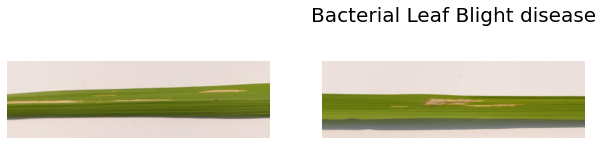

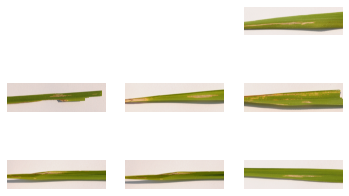

In [38]:
pic_index = 0
# Menampilkan 9 sampel citra kelas Bacterial Leaf Blight
# Set up matplotlib fig, and size it to fit 3x3 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_bacterial_pix = [os.path.join(train_bacterial_dir, fname) 
  for fname in train_bacterial_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_bacterial_pix):
 # Set up subplot; subplot indices start at 1
 sp = plt.subplot(nrows, ncols, i + 1)
 sp.axis('Off') # Don't show axes (or gridlines)
 img = mpimg.imread(img_path)
 plt.imshow(img)
 if (i + 1 == 2):
  plt.title("Bacterial Leaf Blight disease", pad = 40, fontsize = 20)
  plt.show()


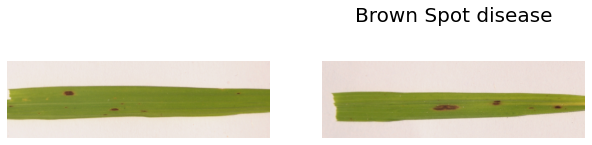

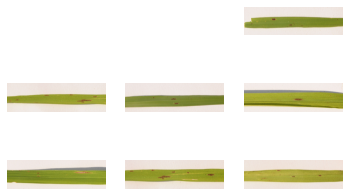

In [37]:
pic_index = 0
# Menampilkan 9 sampel citra kelas Brown Spot
# Set up matplotlib fig, and size it to fit 3x3 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)
pic_index += 9
next_brown_pix = [os.path.join(train_brown_dir, fname)
 for fname in train_brown_names[pic_index-9:pic_index]]
for i, img_path in enumerate(next_brown_pix):
 # Set up subplot; subplot indices start at 1
 sp = plt.subplot(nrows, ncols, i+1)
 sp.axis('Off') # Don't show axes (or gridlines)
 img = mpimg.imread(img_path)
 plt.imshow(img)
 if (i + 1 == 2):
  plt.title("Brown Spot disease", pad = 40, fontsize = 20)
  plt.show()

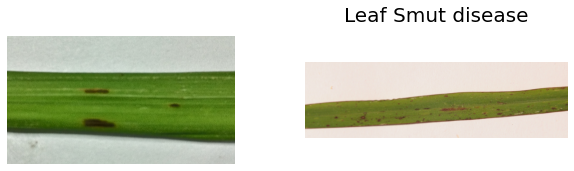

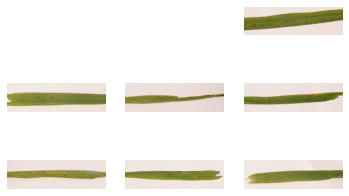

In [40]:
pic_index = 0
# Menampilkan 9 sampel citra kelas Leaf Smut
# Set up matplotlib fig, and size it to fit 3x3 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)
pic_index += 9
next_leaf_pix = [os.path.join(train_leaf_dir, fname)
 for fname in train_leaf_names[pic_index-9:pic_index]]
for i, img_path in enumerate(next_leaf_pix):
 # Set up subplot; subplot indices start at 1
 sp = plt.subplot(nrows, ncols, i+1)
 sp.axis('Off') # Don't show axes (or gridlines)
 img = mpimg.imread(img_path)
 plt.imshow(img)
 if (i + 1 == 2):
  plt.title("Leaf Smut disease", pad = 40, fontsize = 20)
  plt.show()


**PREPROCESSING DATA**

In [47]:
# Preprocessing data citra
dataset = []
mapping = {'Bacterial_Leaf_Blight':0, 'Brown_Spot':1, 'Leaf_Smut':2}
count = 0
for file in os.listdir(dir):
 path = os.path.join(dir,file)
 for im in os.listdir(path):
   image = load_img(os.path.join(path,im), grayscale=False,
color_mode='rgb', target_size=(224,224))
   image = img_to_array(image)
   image = image/255.0
   dataset.append([image,count])
count=count+1

In [48]:
# Mengubah data menjadi array
data,labels0=zip(*dataset)
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(120, 224, 224, 3)
(120, 1)


In [49]:
# Pembagian data training dan testing
train_x,test_x,train_y,test_y=train_test_split(data,labels,test_size=0.2,random_state=13)

In [50]:
# Menampilkan bentuk dimensi data training dan testing
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(96, 224, 224, 3)
(24, 224, 224, 3)
(96, 1)
(24, 1)


In [51]:
# Augmentasi data
datagen = ImageDataGenerator(
 horizontal_flip=True,
 vertical_flip=True,
 rotation_range=20,
 zoom_range=0.2,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.1,
 fill_mode="nearest")

**MEBANGUN DAN MELATIH MODEL MOBILENET V2**

In [53]:
# Mengambil model MobileNetV2 dari TensorFlow Hub
module_selection = ("mobilenet_v2", 224, 1280) #@param
["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

do_fine_tuning = False #@param {type:"boolean"}

SyntaxError: ignored